
# Ethics Analysis - Survey Data
This notebook performs numeric and visual analysis on the cleaned survey data:
- Descriptive statistics
- Likert scale visualization
- Correlation heatmap
- Experience vs confidence analysis


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("../cleaned_survey.csv")
df.head()


,startdate,enddate,status,progress,duration_(in_seconds),finished,recordeddate,responseid,q1,q2,...,q7_1,q7_2,q7_3,q7_4,q7_5,q8,q9,q11,q12,q13
0,2025-10-09 18:45:00,2025-10-09 18:45:00,IP Address,100,30,True,10/9/2025 18:45,R_1distNCv2SSYjjd,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-10-09 18:45:00,2025-10-09 18:53:00,IP Address,100,440,True,10/9/2025 18:53,R_5MEDZFONTk7U9hX,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-10-10 10:17:00,2025-10-10 10:48:00,IP Address,100,1880,True,10/10/2025 10:48,R_1rDioXpbfd74Hj2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-10-10 11:34:00,2025-10-10 12:15:00,IP Address,100,2446,True,10/10/2025 12:15,R_6dcrjQMUOY2MLat,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-10-10 12:15:00,2025-10-10 12:17:00,IP Address,100,104,True,10/10/2025 12:17,R_1gjyOGPoqb0HXy5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## Descriptive Statistics
We start by summarizing the dataset to understand its structure and key metrics.


In [4]:
# Ensure dataframe `df` exists; if not, load it (and import pandas only if needed)
if 'df' not in globals():
	if 'pd' not in globals():
		import pandas as pd
	df = pd.read_csv("../cleaned_survey.csv")

df.describe(include='all')

,startdate,enddate,status,progress,duration_(in_seconds),finished,recordeddate,responseid,q1,q2,...,q7_1,q7_2,q7_3,q7_4,q7_5,q8,q9,q11,q12,q13
count,30,30,30,30.0,30.000000,30,30,30,22,22,...,22.000000,22.000000,22.000000,22.000000,22.000000,17,18,21,21,21
unique,28,29,1,NaN,NaN,1,29,30,1,2,...,NaN,NaN,NaN,NaN,NaN,17,18,3,4,3
top,2025-10-09 18:45:00,2025-11-12 19:20:00,IP Address,NaN,NaN,True,11/12/2025 19:20,R_1distNCv2SSYjjd,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,Ventilator dependent patient wished to eat and...,I have been fortunate enough to have environme...,Corporate Chain,A lot,Depends on the case
freq,2,2,30,NaN,NaN,30,2,1,22,20,...,NaN,NaN,NaN,NaN,NaN,1,1,13,8,13
mean,NaN,NaN,NaN,100.0,461.533333,NaN,NaN,NaN,NaN,NaN,...,4.363636,4.272727,3.727273,4.409091,3.454545,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.0,589.413076,NaN,NaN,NaN,NaN,NaN,...,0.726731,0.984732,0.984732,0.734140,1.143398,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,100.0,24.000000,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,2.000000,3.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,100.0,150.250000,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,3.000000,4.000000,2.250000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,100.0,268.000000,NaN,NaN,NaN,NaN,NaN,...,4.000000,5.000000,4.000000,5.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,100.0,432.500000,NaN,NaN,NaN,NaN,NaN,...,5.000000,5.000000,4.000000,5.000000,4.000000,NaN,NaN,NaN,NaN,NaN



## Likert Scale Analysis
Visualize the distribution of Likert scale responses (Q7_1 to Q7_5).


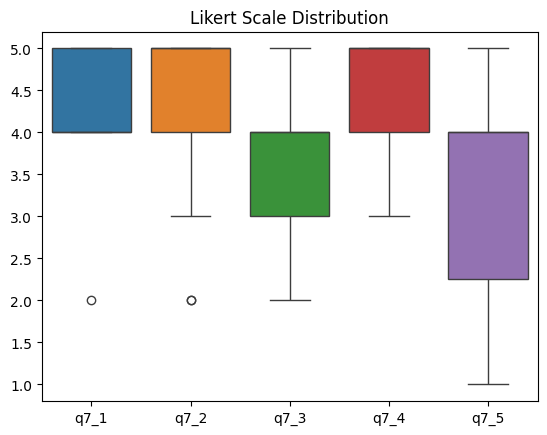

In [5]:

likert_cols = [col for col in df.columns if col.startswith("q7_")]
sns.boxplot(data=df[likert_cols])
plt.title("Likert Scale Distribution")
plt.show()



## Correlation Heatmap
Check relationships between Likert items.


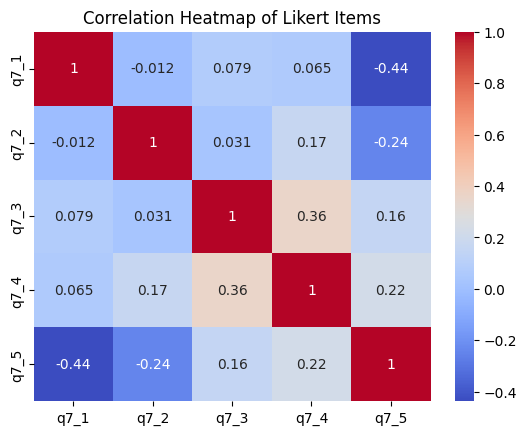

In [6]:

corr = df[likert_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Likert Items")
plt.show()



## Experience vs Confidence
Convert experience ranges to numeric and plot against confidence score.


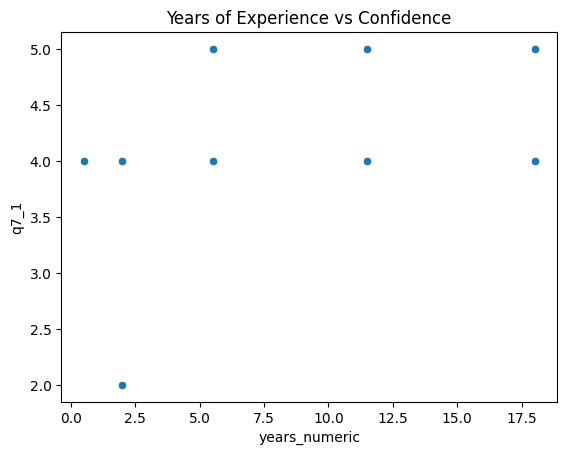

In [7]:

experience_map = {
    "Less than 1 year": 0.5,
    "1-3 years": 2,
    "4-7 years": 5.5,
    "8-15 years": 11.5,
    "16+ years": 18
}
df['years_numeric'] = df['q3'].map(experience_map)

sns.scatterplot(x=df['years_numeric'], y=df['q7_1'])
plt.title("Years of Experience vs Confidence")
plt.show()
